In [ ]:
%reset -f

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


LinregressResult(slope=0.10549684838222372, intercept=307.68522673041866, rvalue=0.39809366158905024, pvalue=7.35525216596736e-05, stderr=0.026524497898479295, intercept_stderr=1.3055065780327124)
LinregressResult(slope=0.26091676188027724, intercept=300.0668040277741, rvalue=0.12356846066798881, pvalue=0.09413794748221023, stderr=0.19711237487135483, intercept_stderr=13.001948219887218)
LinregressResult(slope=0.54905061775427, intercept=319.1507623057221, rvalue=0.2785661638429242, pvalue=0.0012867505237378525, stderr=0.17807569847253754, intercept_stderr=11.746248870834624)
LinregressResult(slope=-0.21069426358573556, intercept=320.1162063463445, rvalue=-0.11138358142151598, pvalue=0.11798917015066811, stderr=0.1768403910895898, intercept_stderr=11.664765388941548)
LinregressResult(slope=0.042746642810531234, intercept=68.60574174003716, rvalue=0.7072051883691327, pvalue=5.071558979705236e-19, stderr=0.00402014670310779, intercept_stderr=0.2651773603979537)
LinregressResult(slope=0.0

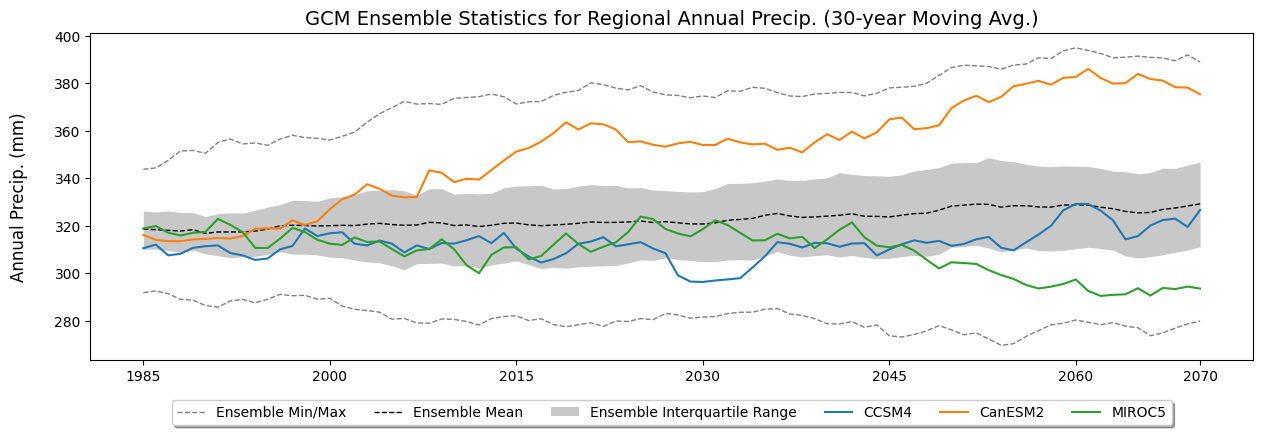

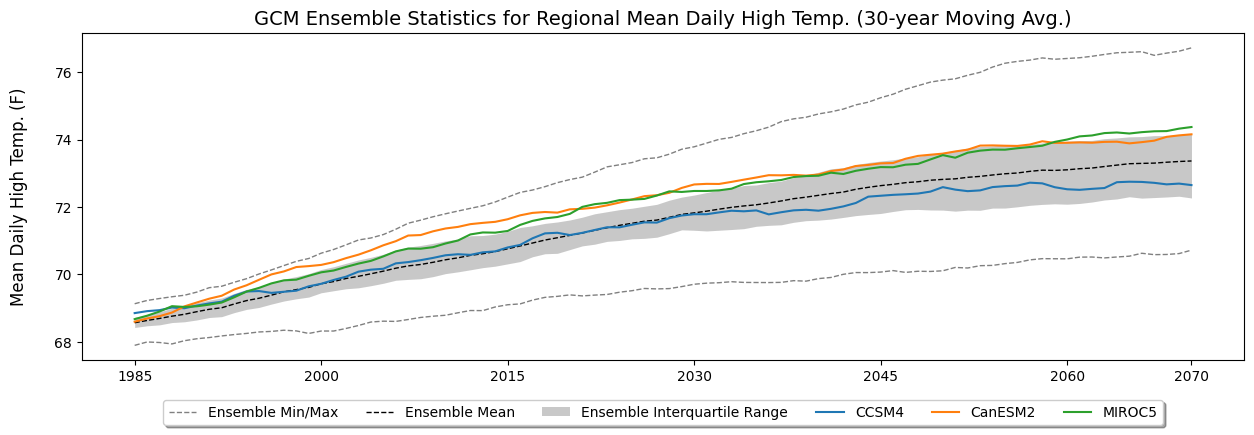

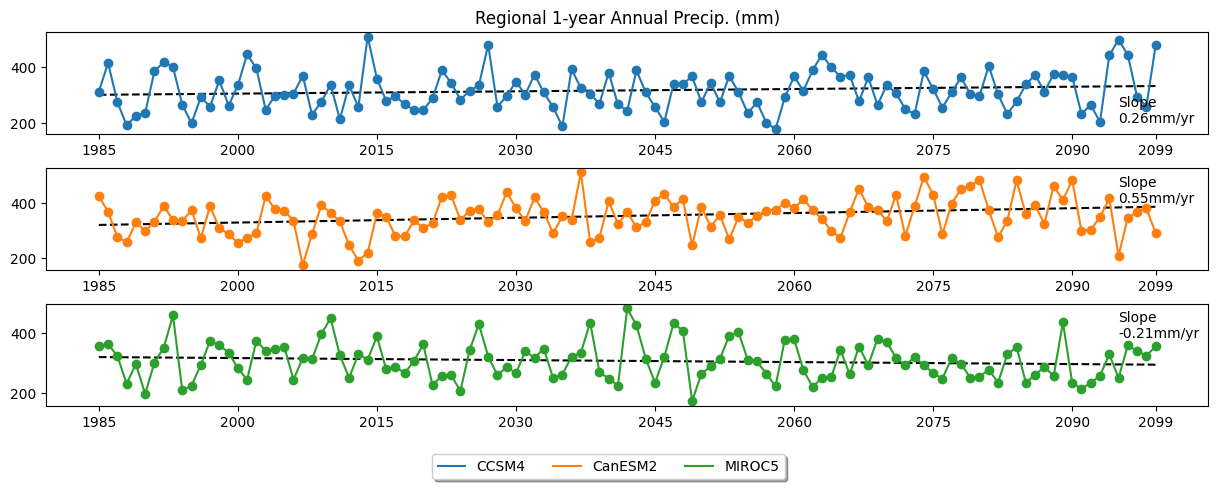

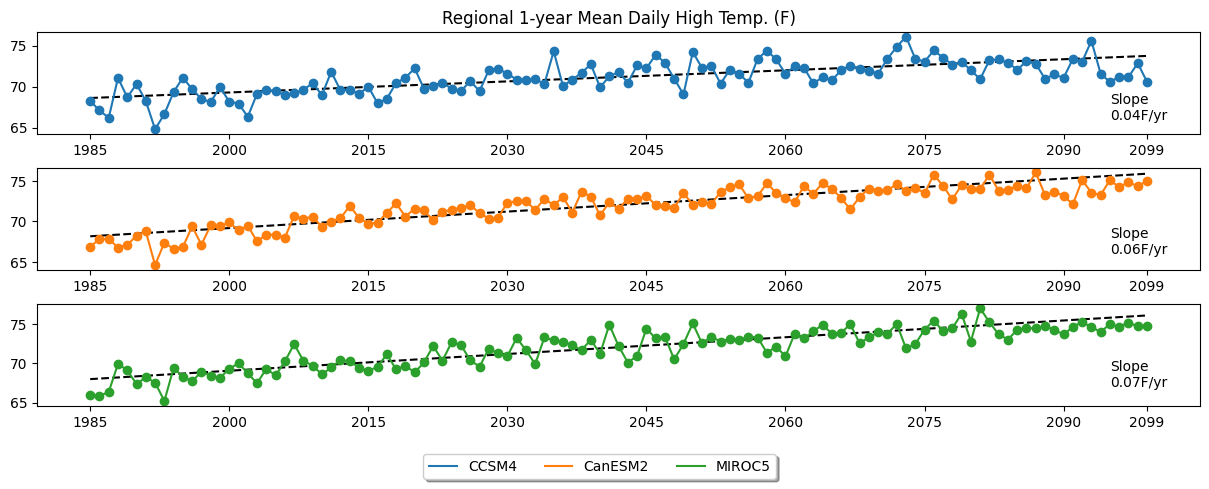

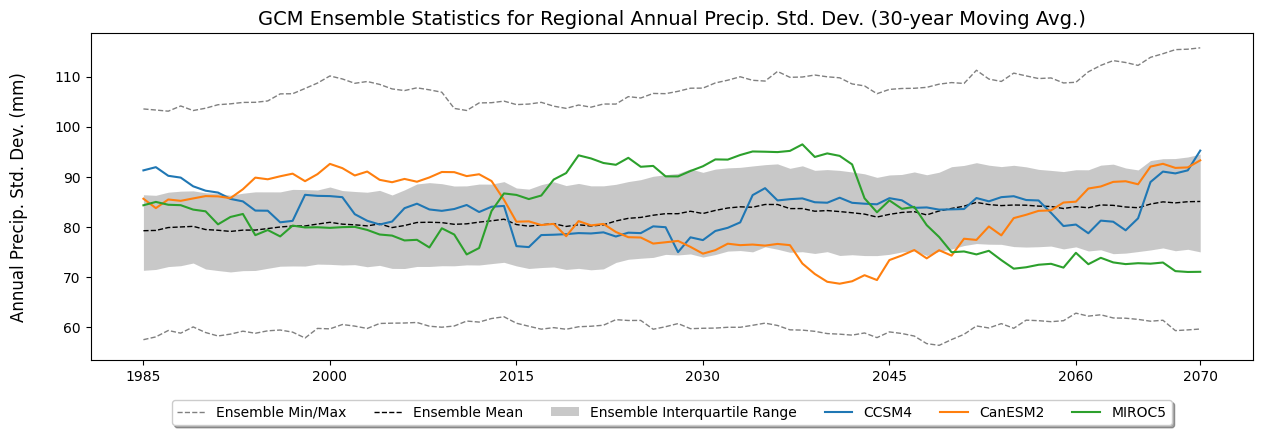

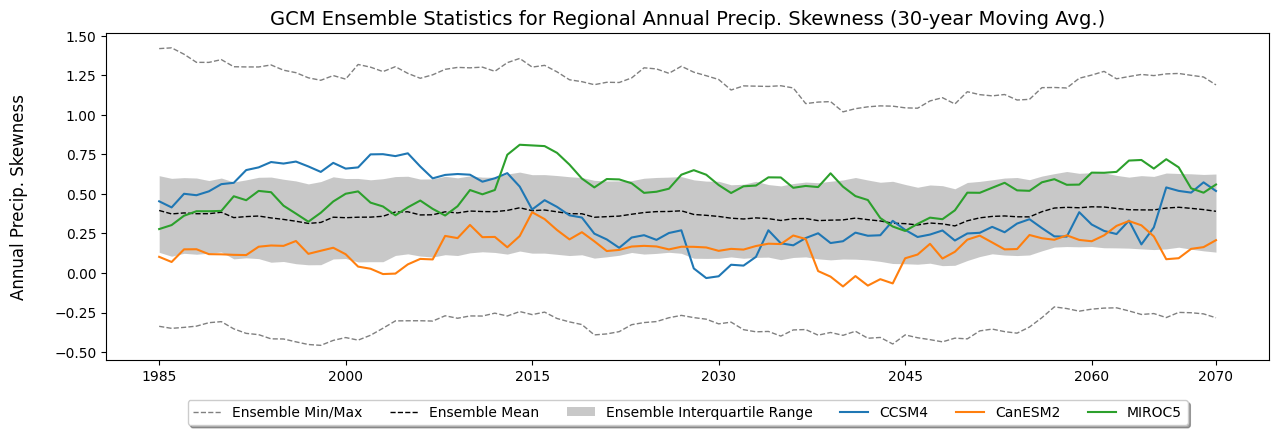

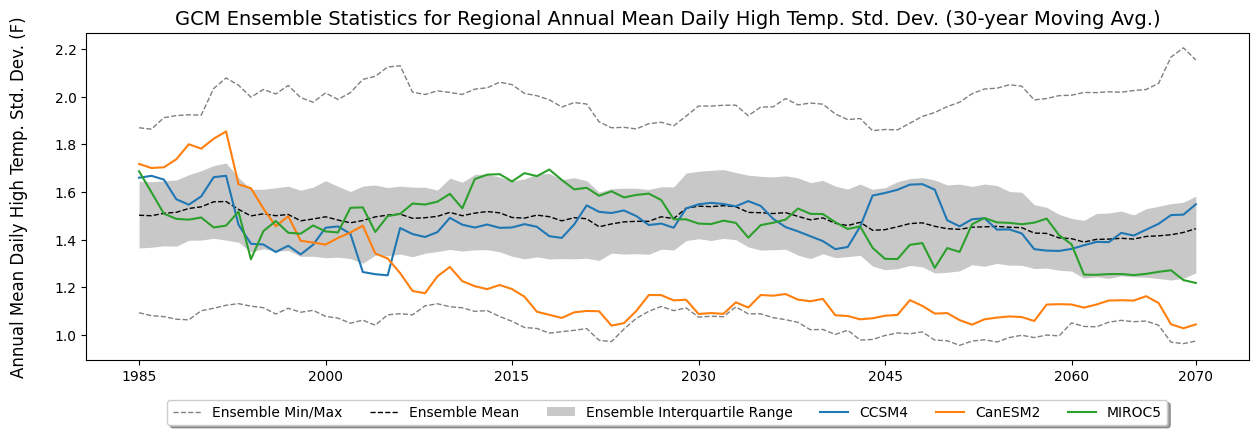

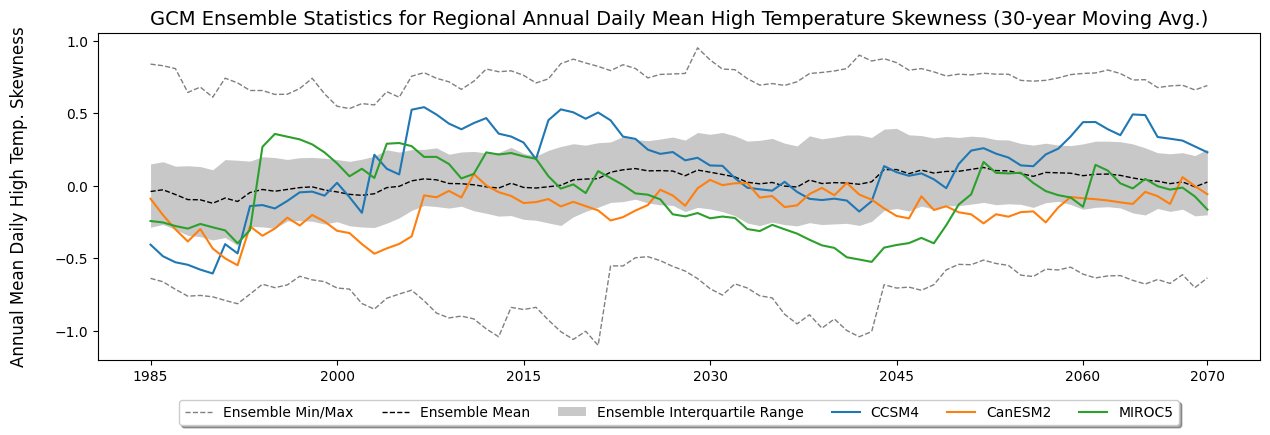

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as scipy
import numpy as np
import os

baseFOLDER = '/content/drive/My Drive/Colab Notebooks/Script Input Files'

precipEnsembleFILE = os.path.join(baseFOLDER, 'NEX_Ensemble_Stats_Precip_MEAN.csv')
tmaxEnsembleFILE = os.path.join(baseFOLDER, 'NEX_Ensemble_Stats_MaxTemp_MEAN.csv')
precip1yrTseriesFILE = os.path.join(baseFOLDER, 'NEX_Regional_1Year_Precip_Tseries.csv')
tmax1yrTseriesFILE = os.path.join(baseFOLDER, 'NEX_Regional_1Year_MaxTemp_Tseries.csv')
precipsdevEnsembleFILE = os.path.join(baseFOLDER, 'NEX_Ensemble_Stats_Precip_SDEV.csv')
tmaxsdevEnsembleFILE = os.path.join(baseFOLDER, 'NEX_Ensemble_Stats_MaxTemp_SDEV.csv')
precipskewEnsembleFILE = os.path.join(baseFOLDER, 'NEX_Ensemble_Stats_Precip_SKEW.csv')
tmaxskewEnsembleFILE = os.path.join(baseFOLDER, 'NEX_Ensemble_Stats_MaxTemp_SKEW.csv')



fig, ax = plt.subplots(figsize=(15, 5))

df_tseries = pd.read_csv(precipEnsembleFILE)
ccsm4_tseries = df_tseries['CCSM4']
canesm2_tseries = df_tseries['CanESM2']
miroc5_tseries = df_tseries['MIROC5']

df_ensemble = pd.read_csv(precipEnsembleFILE)
min_tseries = df_ensemble['min']
q25_tseries = df_ensemble['q25']
mean_tseries = df_ensemble['avg']
q75_tseries = df_ensemble['q75']
max_tseries = df_ensemble['max']

y = np.array(ccsm4_tseries)
x = np.array([i for i, elem in enumerate(range(0, 86))])
res = scipy.stats.linregress(x, y, alternative='greater')
slope = res.slope
print(res)

ax.plot(range(1985, 2071), min_tseries, linestyle='--', color='gray', linewidth=1, label='Ensemble Min/Max')
ax.plot(range(1985, 2071), mean_tseries, linestyle='--', color='black', linewidth=1, label='Ensemble Mean')
ax.fill_between(range(1985, 2071), q25_tseries, q75_tseries, linewidth=0, color='#272727', alpha=0.25, label='Ensemble Interquartile Range')
ax.plot(range(1985, 2071), max_tseries, linestyle='--', color='gray', linewidth=1)
ax.plot(range(1985, 2071), ccsm4_tseries, label='CCSM4')
ax.plot(range(1985, 2071), canesm2_tseries, label='CanESM2')
ax.plot(range(1985, 2071), miroc5_tseries, label='MIROC5')

ax.set_title('GCM Ensemble Statistics for Regional Annual Precip. (30-year Moving Avg.)', size=14)
ax.set_ylabel('Annual Precip. (mm)\n', size=12)
ax.set_xticks([1985, 2000, 2015, 2030, 2045, 2060, 2070])

# Shrink current axis's height by 15% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15,
                 box.width, box.height * 0.85])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=6)

fig.show()



fig, ax = plt.subplots(figsize=(15, 5))

df_tseries = pd.read_csv(tmaxEnsembleFILE)
ccsm4_tseries = df_tseries['CCSM4']
canesm2_tseries = df_tseries['CanESM2']
miroc5_tseries = df_tseries['MIROC5']

df_ensemble = pd.read_csv(tmaxEnsembleFILE)
min_tseries = df_ensemble['min']
q25_tseries = df_ensemble['q25']
mean_tseries = df_ensemble['avg']
q75_tseries = df_ensemble['q75']
max_tseries = df_ensemble['max']

ax.plot(range(1985, 2071), min_tseries, linestyle='--', color='gray', linewidth=1, label='Ensemble Min/Max')
ax.plot(range(1985, 2071), mean_tseries, linestyle='--', color='black', linewidth=1, label='Ensemble Mean')
ax.fill_between(range(1985, 2071), q25_tseries, q75_tseries, linewidth=0, color='#272727', alpha=0.25, label='Ensemble Interquartile Range')
ax.plot(range(1985, 2071), max_tseries, linestyle='--', color='gray', linewidth=1)
ax.plot(range(1985, 2071), ccsm4_tseries, label='CCSM4')
ax.plot(range(1985, 2071), canesm2_tseries, label='CanESM2')
ax.plot(range(1985, 2071), miroc5_tseries, label='MIROC5')

ax.set_title('GCM Ensemble Statistics for Regional Mean Daily High Temp. (30-year Moving Avg.)', size=14)
ax.set_ylabel('Mean Daily High Temp. (F)\n', size=12)
ax.set_xticks([1985, 2000, 2015, 2030, 2045, 2060, 2070])

# Shrink current axis's height by 15% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15,
                 box.width, box.height * 0.85])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=6)

fig.show()



df_tseries = pd.read_csv(precip1yrTseriesFILE)
ccsm4_tseries = df_tseries['CCSM4']
df_tseries = pd.read_csv(precip1yrTseriesFILE)
canESM2_tseries = df_tseries['CanESM2']
df_tseries = pd.read_csv(precip1yrTseriesFILE)
miroc5_tseries = df_tseries['MIROC5']

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
box = ax0.get_position()
ax0.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax0.set_title('Regional 1-year Annual Precip. (mm)')

ax0.plot([i for i, elem in enumerate(range(1985, 2100))], ccsm4_tseries, color='#1f77b4', label='CCSM4')
ax0.scatter([i for i, elem in enumerate(range(1985, 2100))], ccsm4_tseries, color='#1f77b4')
ax0.set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 114])
ax0.set_xticklabels([1985, 2000, 2015, 2030, 2045, 2060, 2075, 2090, 2099])
y = np.array(ccsm4_tseries)
x = np.array([i for i, elem in enumerate(range(1985, 2100))])
res = scipy.stats.linregress(x, y, alternative='greater')
print(res)
slope = res.slope
yint = res.intercept
ax0.plot([0, 114],[slope*0 + yint, slope*120 + yint], linestyle='--', color='black', zorder=-999)
ax0.text(110, 200, 'Slope\n{}mm/yr'.format(round(slope, 2)))

ax1.plot([i for i, elem in enumerate(range(1985, 2100))], canESM2_tseries, color='#ff7f0e', label='CanESM2')
ax1.scatter([i for i, elem in enumerate(range(1985, 2100))], canESM2_tseries, color='#ff7f0e')
ax1.set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 114])
ax1.set_xticklabels([1985, 2000, 2015, 2030, 2045, 2060, 2075, 2090, 2099])
y = np.array(canESM2_tseries)
x = np.array([i for i, elem in enumerate(range(1985, 2100))])
res = scipy.stats.linregress(x, y, alternative='greater')
print(res)
slope = res.slope
yint = res.intercept
ax1.plot([0, 114],[slope*0 + yint, slope*120 + yint], linestyle='--', color='black', zorder=-999)
ax1.text(110, 400, 'Slope\n{}mm/yr'.format(round(slope, 2)))

ax2.plot([i for i, elem in enumerate(range(1985, 2100))], miroc5_tseries, color='#2ca02c', label='MIROC5')
ax2.scatter([i for i, elem in enumerate(range(1985, 2100))], miroc5_tseries, color='#2ca02c')
ax2.set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 114])
ax2.set_xticklabels([1985, 2000, 2015, 2030, 2045, 2060, 2075, 2090, 2099])
y = np.array(miroc5_tseries)
x = np.array([i for i, elem in enumerate(range(1985, 2100))])
res = scipy.stats.linregress(x, y, alternative='less')
print(res)
slope = res.slope
yint = res.intercept
ax2.plot([0, 114],[slope*0 + yint, slope*120 + yint], linestyle='--', color='black', zorder=-999)
ax2.text(110, 385, 'Slope\n{}mm/yr'.format(round(slope, 2)))

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05),
           fancybox=True, shadow=True, ncol=6)

fig.show()



df_tseries = pd.read_csv(tmax1yrTseriesFILE)
ccsm4_tseries = df_tseries['CCSM4']
df_tseries = pd.read_csv(tmax1yrTseriesFILE)
canESM2_tseries = df_tseries['CanESM2']
df_tseries = pd.read_csv(tmax1yrTseriesFILE)
miroc5_tseries = df_tseries['MIROC5']

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
box = ax0.get_position()
ax0.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax0.set_title('Regional 1-year Mean Daily High Temp. (F)')

ax0.plot([i for i, elem in enumerate(range(1985, 2100))], ccsm4_tseries, color='#1f77b4', label='CCSM4')
ax0.scatter([i for i, elem in enumerate(range(1985, 2100))], ccsm4_tseries, color='#1f77b4')
ax0.set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 114])
ax0.set_xticklabels([1985, 2000, 2015, 2030, 2045, 2060, 2075, 2090, 2099])
y = np.array(ccsm4_tseries)
x = np.array([i for i, elem in enumerate(range(1985, 2100))])
res = scipy.stats.linregress(x, y, alternative='greater')
print(res)
slope = res.slope
yint = res.intercept
ax0.plot([0, 114],[slope*0 + yint, slope*120 + yint], linestyle='--', color='black', zorder=-999)
ax0.text(110, 66, 'Slope\n{}F/yr'.format(round(slope, 2)))

ax1.plot([i for i, elem in enumerate(range(1985, 2100))], canESM2_tseries, color='#ff7f0e', label='CanESM2')
ax1.scatter([i for i, elem in enumerate(range(1985, 2100))], canESM2_tseries, color='#ff7f0e')
ax1.set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 114])
ax1.set_xticklabels([1985, 2000, 2015, 2030, 2045, 2060, 2075, 2090, 2099])
y = np.array(canESM2_tseries)
x = np.array([i for i, elem in enumerate(range(1985, 2100))])
res = scipy.stats.linregress(x, y, alternative='greater')
print(res)
slope = res.slope
yint = res.intercept
ax1.plot([0, 114],[slope*0 + yint, slope*120 + yint], linestyle='--', color='black', zorder=-999)
ax1.text(110, 66, 'Slope\n{}F/yr'.format(round(slope, 2)))

ax2.plot([i for i, elem in enumerate(range(1985, 2100))], miroc5_tseries, color='#2ca02c', label='MIROC5')
ax2.scatter([i for i, elem in enumerate(range(1985, 2100))], miroc5_tseries, color='#2ca02c')
ax2.set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 114])
ax2.set_xticklabels([1985, 2000, 2015, 2030, 2045, 2060, 2075, 2090, 2099])
y = np.array(miroc5_tseries)
x = np.array([i for i, elem in enumerate(range(1985, 2100))])
res = scipy.stats.linregress(x, y, alternative='greater')
print(res)
slope = res.slope
yint = res.intercept
ax2.plot([0, 114],[slope*0 + yint, slope*120 + yint], linestyle='--', color='black', zorder=-999)
ax2.text(110, 67, 'Slope\n{}F/yr'.format(round(slope, 2)))


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05),
           fancybox=True, shadow=True, ncol=6)

fig.show()



fig, ax = plt.subplots(figsize=(15, 5))

df_tseries = pd.read_csv(precipsdevEnsembleFILE)
ccsm4_tseries = df_tseries['CCSM4']
canesm2_tseries = df_tseries['CanESM2']
miroc5_tseries = df_tseries['MIROC5']

df_ensemble = pd.read_csv(precipsdevEnsembleFILE)
min_tseries = df_ensemble['min']
q25_tseries = df_ensemble['q25']
mean_tseries = df_ensemble['avg']
q75_tseries = df_ensemble['q75']
max_tseries = df_ensemble['max']

y = np.array(ccsm4_tseries)
x = np.array([i for i, elem in enumerate(range(0, 86))])
res = scipy.stats.linregress(x, y, alternative='greater')
slope = res.slope
print(res)

ax.plot(range(1985, 2071), min_tseries, linestyle='--', color='gray', linewidth=1, label='Ensemble Min/Max')
ax.plot(range(1985, 2071), mean_tseries, linestyle='--', color='black', linewidth=1, label='Ensemble Mean')
ax.fill_between(range(1985, 2071), q25_tseries, q75_tseries, linewidth=0, color='#272727', alpha=0.25, label='Ensemble Interquartile Range')
ax.plot(range(1985, 2071), max_tseries, linestyle='--', color='gray', linewidth=1)
ax.plot(range(1985, 2071), ccsm4_tseries, label='CCSM4')
ax.plot(range(1985, 2071), canesm2_tseries, label='CanESM2')
ax.plot(range(1985, 2071), miroc5_tseries, label='MIROC5')

ax.set_title('GCM Ensemble Statistics for Regional Annual Precip. Std. Dev. (30-year Moving Avg.)', size=14)
ax.set_ylabel('Annual Precip. Std. Dev. (mm)\n', size=12)
ax.set_xticks([1985, 2000, 2015, 2030, 2045, 2060, 2070])

# Shrink current axis's height by 15% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15,
                 box.width, box.height * 0.85])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=6)

fig.show()



fig, ax = plt.subplots(figsize=(15, 5))

df_tseries = pd.read_csv(precipskewEnsembleFILE)
ccsm4_tseries = df_tseries['CCSM4']
canesm2_tseries = df_tseries['CanESM2']
miroc5_tseries = df_tseries['MIROC5']

df_ensemble = pd.read_csv(precipskewEnsembleFILE)
min_tseries = df_ensemble['min']
q25_tseries = df_ensemble['q25']
mean_tseries = df_ensemble['avg']
q75_tseries = df_ensemble['q75']
max_tseries = df_ensemble['max']

y = np.array(ccsm4_tseries)
x = np.array([i for i, elem in enumerate(range(0, 86))])
res = scipy.stats.linregress(x, y, alternative='greater')
slope = res.slope
print(res)

ax.plot(range(1985, 2071), min_tseries, linestyle='--', color='gray', linewidth=1, label='Ensemble Min/Max')
ax.plot(range(1985, 2071), mean_tseries, linestyle='--', color='black', linewidth=1, label='Ensemble Mean')
ax.fill_between(range(1985, 2071), q25_tseries, q75_tseries, linewidth=0, color='#272727', alpha=0.25, label='Ensemble Interquartile Range')
ax.plot(range(1985, 2071), max_tseries, linestyle='--', color='gray', linewidth=1)
ax.plot(range(1985, 2071), ccsm4_tseries, label='CCSM4')
ax.plot(range(1985, 2071), canesm2_tseries, label='CanESM2')
ax.plot(range(1985, 2071), miroc5_tseries, label='MIROC5')

ax.set_title('GCM Ensemble Statistics for Regional Annual Precip. Skewness (30-year Moving Avg.)', size=14)
ax.set_ylabel('Annual Precip. Skewness\n', size=12)
ax.set_xticks([1985, 2000, 2015, 2030, 2045, 2060, 2070])

# Shrink current axis's height by 15% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15,
                 box.width, box.height * 0.85])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=6)

fig.show()



fig, ax = plt.subplots(figsize=(15, 5))

df_tseries = pd.read_csv(tmaxsdevEnsembleFILE)
ccsm4_tseries = df_tseries['CCSM4']
canesm2_tseries = df_tseries['CanESM2']
miroc5_tseries = df_tseries['MIROC5']

df_ensemble = pd.read_csv(tmaxsdevEnsembleFILE)
min_tseries = df_ensemble['min']
q25_tseries = df_ensemble['q25']
mean_tseries = df_ensemble['avg']
q75_tseries = df_ensemble['q75']
max_tseries = df_ensemble['max']

y = np.array(ccsm4_tseries)
x = np.array([i for i, elem in enumerate(range(0, 86))])
res = scipy.stats.linregress(x, y, alternative='greater')
slope = res.slope
print(res)

ax.plot(range(1985, 2071), min_tseries, linestyle='--', color='gray', linewidth=1, label='Ensemble Min/Max')
ax.plot(range(1985, 2071), mean_tseries, linestyle='--', color='black', linewidth=1, label='Ensemble Mean')
ax.fill_between(range(1985, 2071), q25_tseries, q75_tseries, linewidth=0, color='#272727', alpha=0.25, label='Ensemble Interquartile Range')
ax.plot(range(1985, 2071), max_tseries, linestyle='--', color='gray', linewidth=1)
ax.plot(range(1985, 2071), ccsm4_tseries, label='CCSM4')
ax.plot(range(1985, 2071), canesm2_tseries, label='CanESM2')
ax.plot(range(1985, 2071), miroc5_tseries, label='MIROC5')

ax.set_title('GCM Ensemble Statistics for Regional Annual Mean Daily High Temp. Std. Dev. (30-year Moving Avg.)', size=14)
ax.set_ylabel('Annual Mean Daily High Temp. Std. Dev. (F)\n', size=12)
ax.set_xticks([1985, 2000, 2015, 2030, 2045, 2060, 2070])

# Shrink current axis's height by 15% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15,
                 box.width, box.height * 0.85])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=6)

fig.show()



fig, ax = plt.subplots(figsize=(15, 5))

df_tseries = pd.read_csv(tmaxskewEnsembleFILE)
ccsm4_tseries = df_tseries['CCSM4']
canesm2_tseries = df_tseries['CanESM2']
miroc5_tseries = df_tseries['MIROC5']

df_ensemble = pd.read_csv(tmaxskewEnsembleFILE)
min_tseries = df_ensemble['min']
q25_tseries = df_ensemble['q25']
mean_tseries = df_ensemble['avg']
q75_tseries = df_ensemble['q75']
max_tseries = df_ensemble['max']

y = np.array(ccsm4_tseries)
x = np.array([i for i, elem in enumerate(range(0, 86))])
res = scipy.stats.linregress(x, y, alternative='greater')
slope = res.slope
print(res)

ax.plot(range(1985, 2071), min_tseries, linestyle='--', color='gray', linewidth=1, label='Ensemble Min/Max')
ax.plot(range(1985, 2071), mean_tseries, linestyle='--', color='black', linewidth=1, label='Ensemble Mean')
ax.fill_between(range(1985, 2071), q25_tseries, q75_tseries, linewidth=0, color='#272727', alpha=0.25, label='Ensemble Interquartile Range')
ax.plot(range(1985, 2071), max_tseries, linestyle='--', color='gray', linewidth=1)
ax.plot(range(1985, 2071), ccsm4_tseries, label='CCSM4')
ax.plot(range(1985, 2071), canesm2_tseries, label='CanESM2')
ax.plot(range(1985, 2071), miroc5_tseries, label='MIROC5')

ax.set_title('GCM Ensemble Statistics for Regional Annual Daily Mean High Temperature Skewness (30-year Moving Avg.)', size=14)
ax.set_ylabel('Annual Mean Daily High Temp. Skewness\n', size=12)
ax.set_xticks([1985, 2000, 2015, 2030, 2045, 2060, 2070])

# Shrink current axis's height by 15% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15,
                 box.width, box.height * 0.85])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=6)

fig.show()